# Clustering the Countries by using Unsupervised Learning for HELP International
### Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

### About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

### Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

<a id = '0'></a>


* [Data Cleaning & Preparation](#1.0)
    
* [Exploratory Data Analysis (EDA)](#2.0)
    
*  **Machine Learning Clustering Model**
    * [K-means](#3.0)
    * [Hierarchical Clustering](#4.0)
    
*  **Result**
    * [Summary](#5.0)
    * [Selected Countries](#6.0)

# 0. Import necessary Packages

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#  1. Load the Data into Pandas Dataframe

In [20]:
df = pd.read_csv('Country-data.csv')
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [21]:
df.shape

(167, 10)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<a id = '1.0'></a>
# 2. Data Cleaning & Preparation

Checking the existance of missing values, the type of variables, or integrity of data.

## 2.1. Checking for missing value

In [23]:
# Checking for missing value in each columns
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### 2.2. Check data for duplicate rows and remove the duplicate


In [24]:
duplicates = df.duplicated()
sum(duplicates)

0

<a id = '2.0'></a>
# 3. Exploratory Data Analysis (EDA)

### 3.1. Quick check on overall EDA

In [17]:
# Quick check on overall EDA before go into more details
#!pip install quick-eda
import quick_eda
from quick_eda.df_eda import df_eda

df_eda(df)

Head of dataframe:

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
- - - - - - - - - - - - - - - - - - - - - - - -

Tail of dataframe:

       country  child_mort  exports  health  imports  income  inflation  \
162    Vanuatu        29.2     46.6    5.25     52.7    2950       2.62   
163  Venezuela        17.1     28.5    4.91     17.6   165

### 3.2. Univariate Analysis

----------------------------------------------------------------------------------------------
child_mort


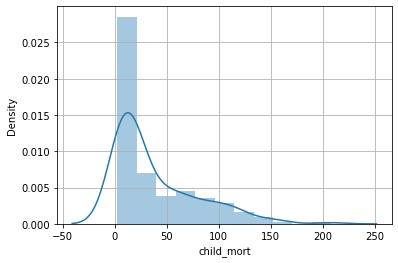

----------------------------------------------------------------------------------------------
exports


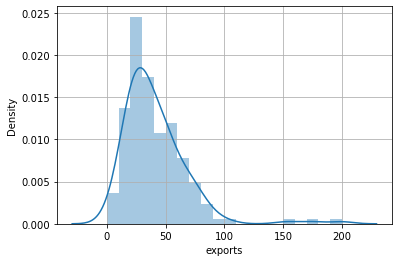

----------------------------------------------------------------------------------------------
health


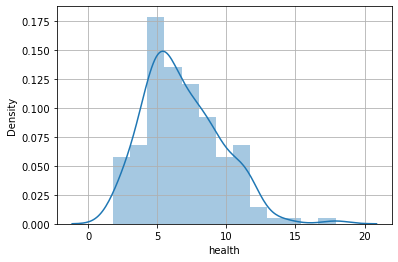

----------------------------------------------------------------------------------------------
imports


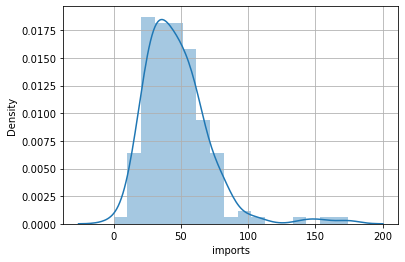

----------------------------------------------------------------------------------------------
income


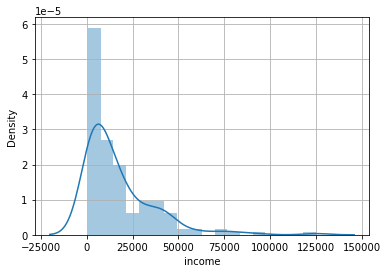

----------------------------------------------------------------------------------------------
inflation


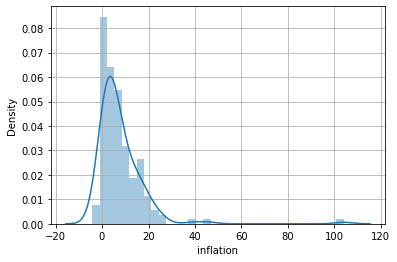

----------------------------------------------------------------------------------------------
life_expec


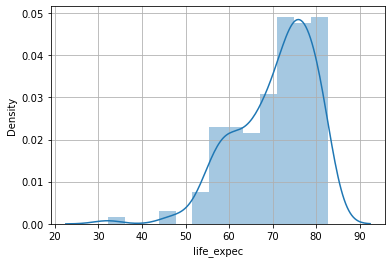

----------------------------------------------------------------------------------------------
total_fer


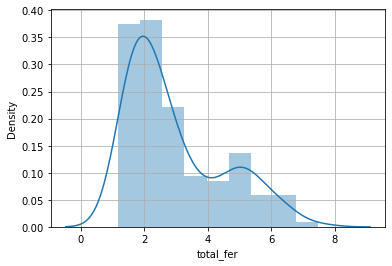

----------------------------------------------------------------------------------------------
gdpp


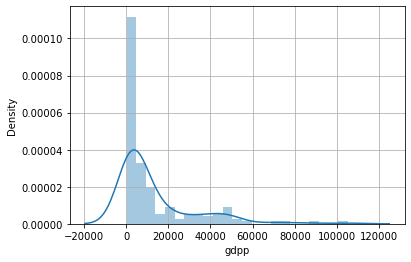

In [25]:
for column in df.columns[1:]:
    print('----------------------------------------------------------------------------------------------')
    print(column)
    sns.distplot(df[column])
    plt.grid(True)
    plt.show()

----------------------------------------------------------------------------------------------
child_mort


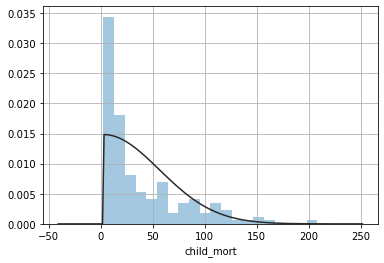

----------------------------------------------------------------------------------------------
exports


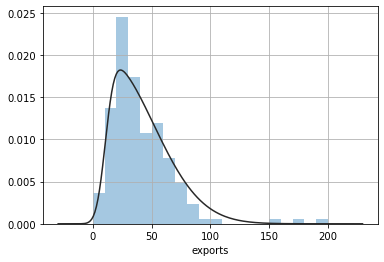

----------------------------------------------------------------------------------------------
health


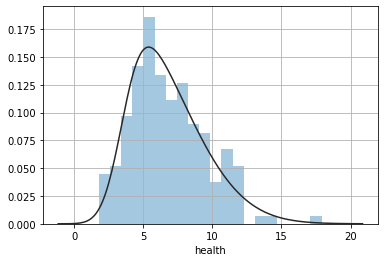

----------------------------------------------------------------------------------------------
imports


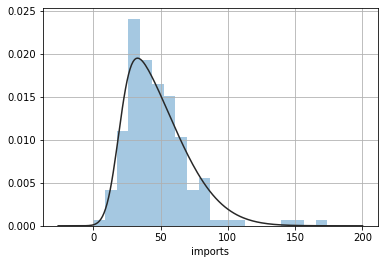

----------------------------------------------------------------------------------------------
income


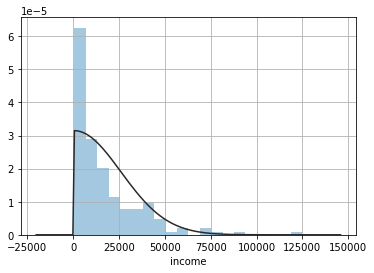

----------------------------------------------------------------------------------------------
inflation


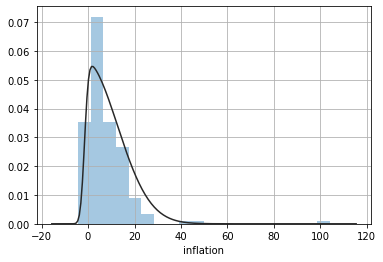

----------------------------------------------------------------------------------------------
life_expec


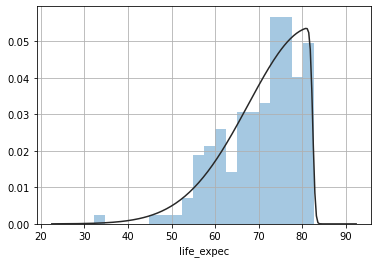

----------------------------------------------------------------------------------------------
total_fer


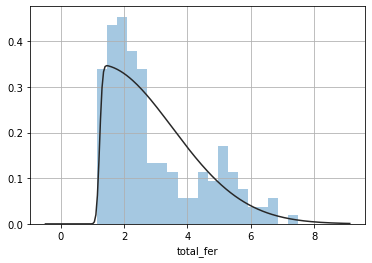

----------------------------------------------------------------------------------------------
gdpp


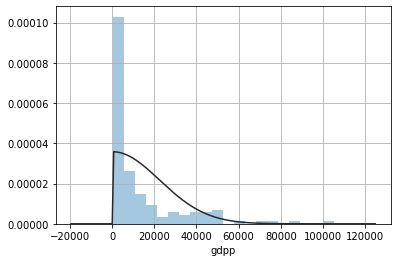

In [27]:
from scipy.stats import skewnorm

for column in df.columns[1:]:
    print('----------------------------------------------------------------------------------------------')
    print(column)
    sns.distplot(df[column], bins=20, fit=skewnorm, kde=False)
    plt.grid(True)
    plt.show()

----------------------------------------------------------------------------------------------
child_mort


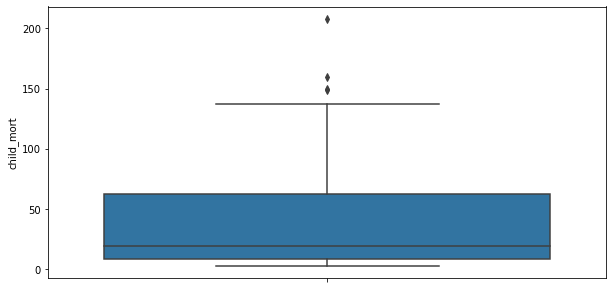

----------------------------------------------------------------------------------------------
exports


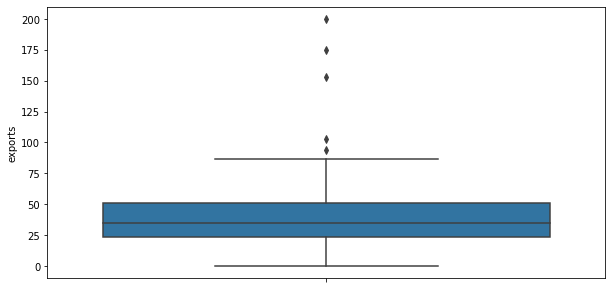

----------------------------------------------------------------------------------------------
health


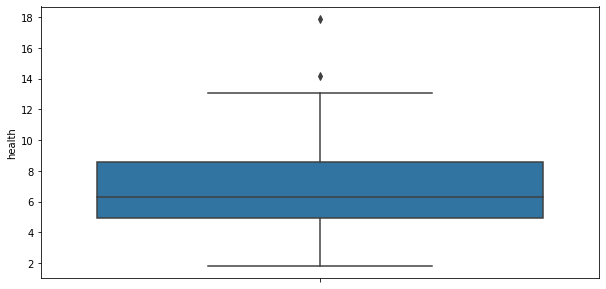

----------------------------------------------------------------------------------------------
imports


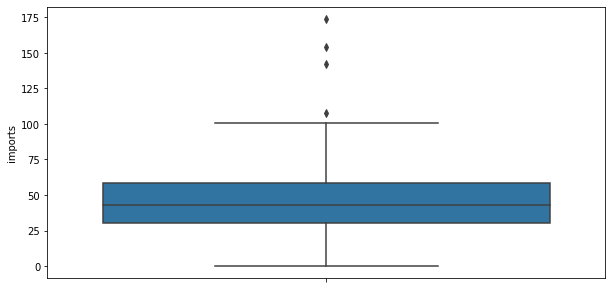

----------------------------------------------------------------------------------------------
income


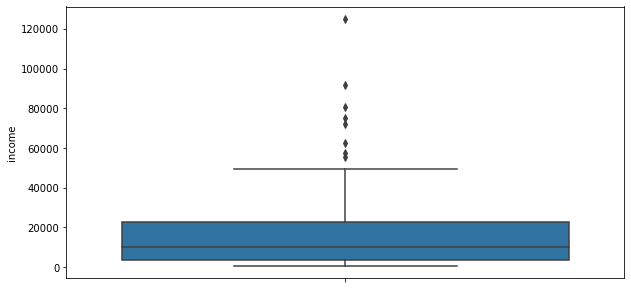

----------------------------------------------------------------------------------------------
inflation


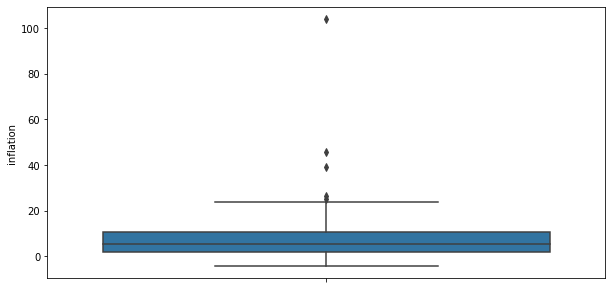

----------------------------------------------------------------------------------------------
life_expec


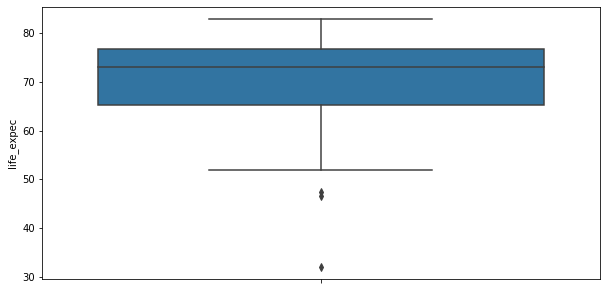

----------------------------------------------------------------------------------------------
total_fer


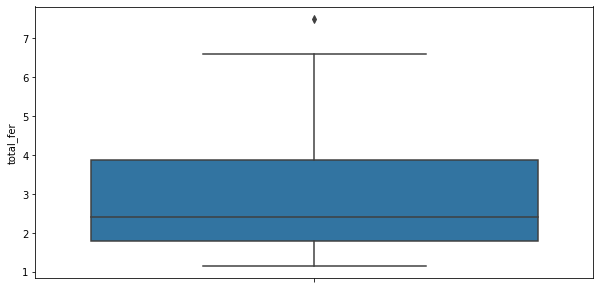

----------------------------------------------------------------------------------------------
gdpp


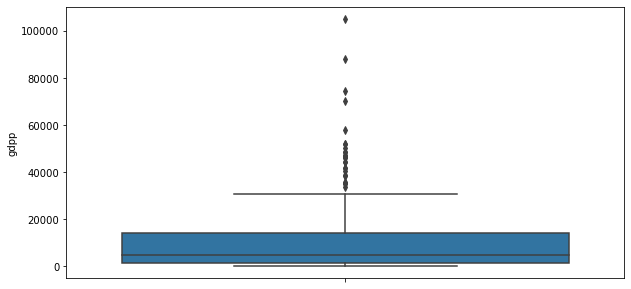

In [29]:
for column in df.columns[1:]:
    print('----------------------------------------------------------------------------------------------')
    print(column)
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, y=column)
    plt.show()

### 3.2. Bivariate Analysis

<Figure size 288x288 with 0 Axes>

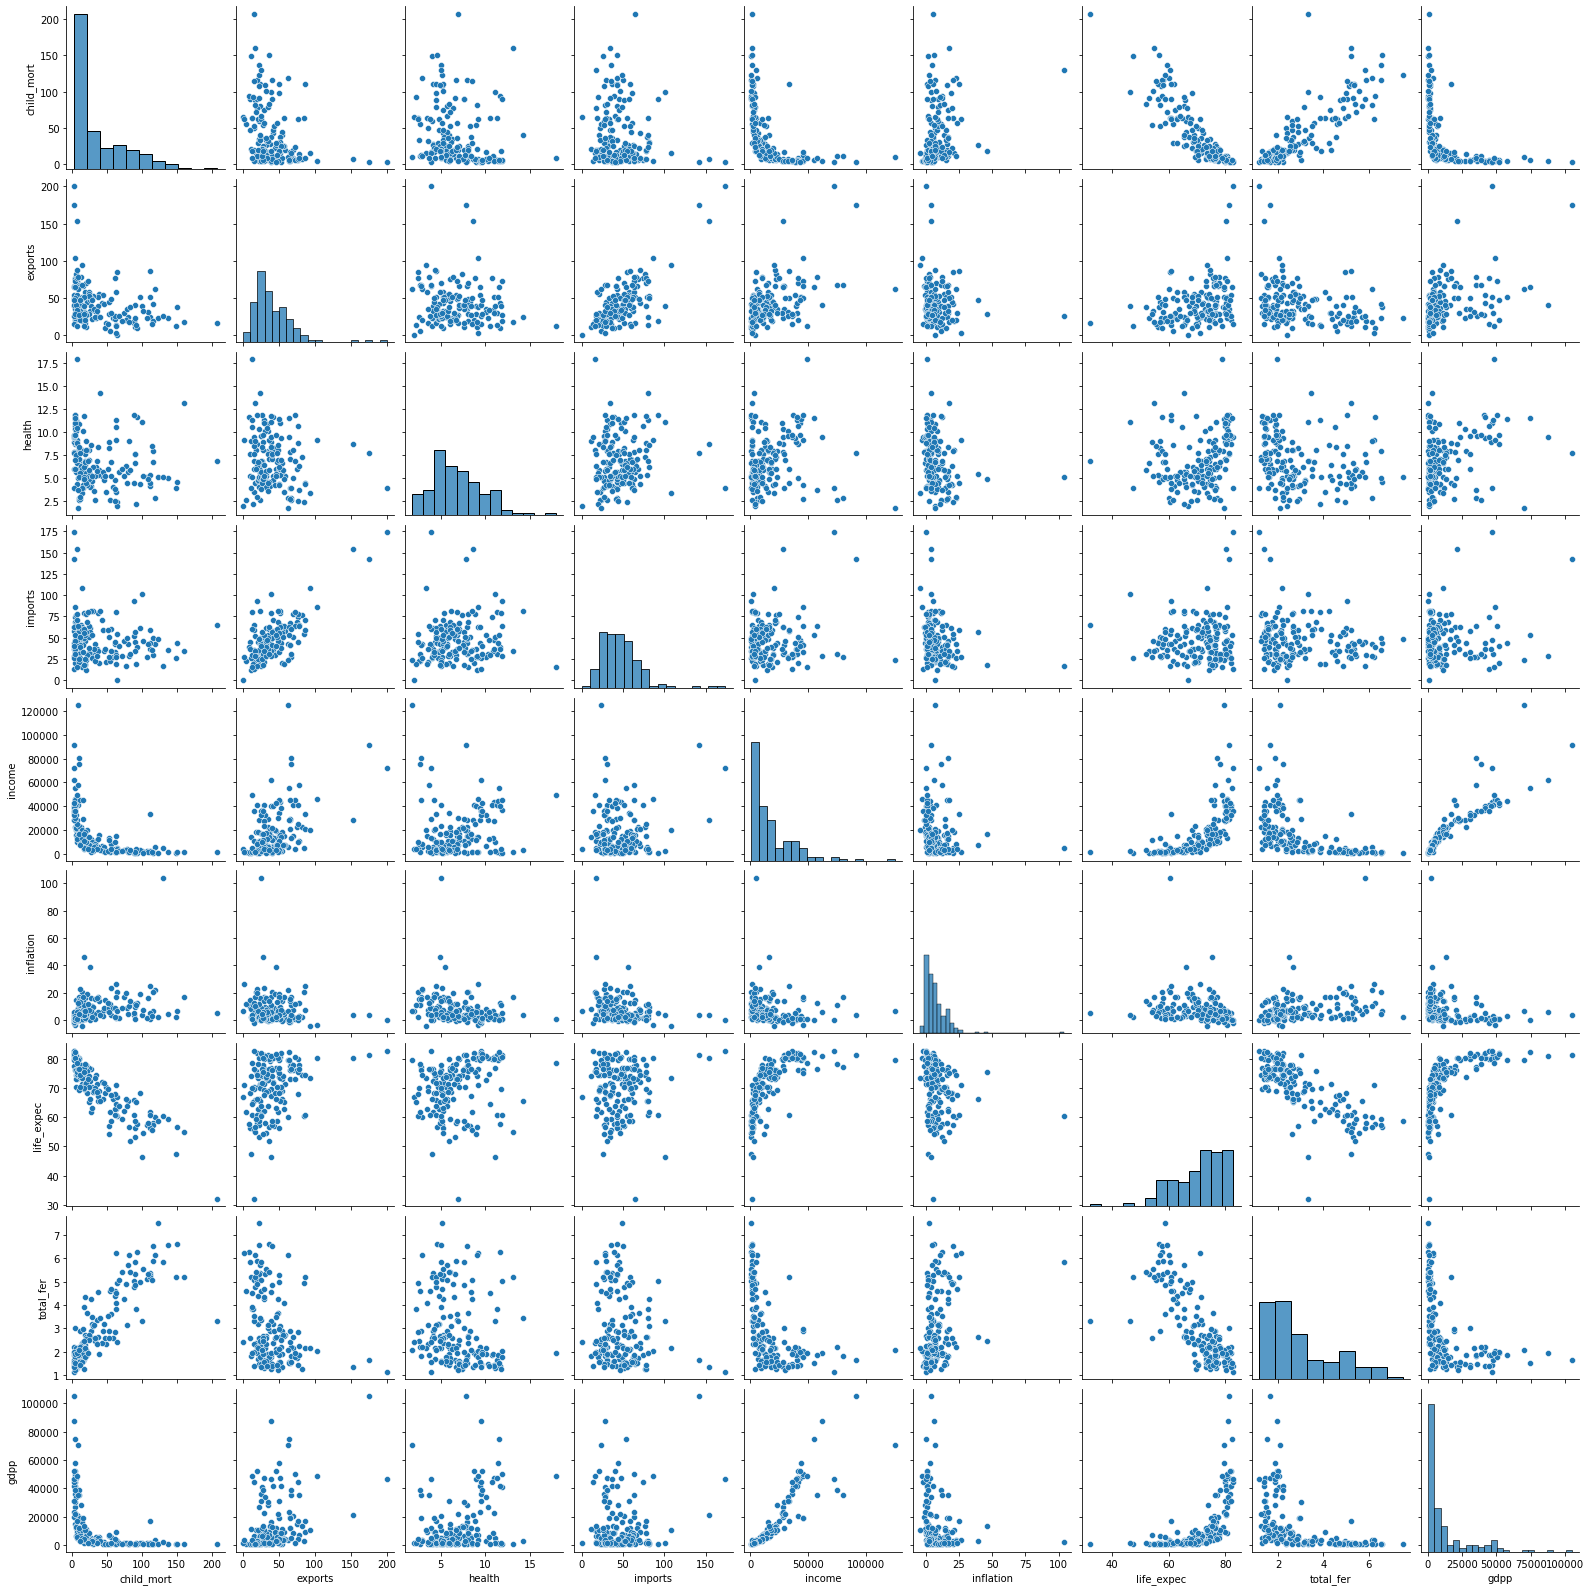

In [30]:
plt.figure(figsize = (4, 4))
sns.pairplot(df)
plt.show()

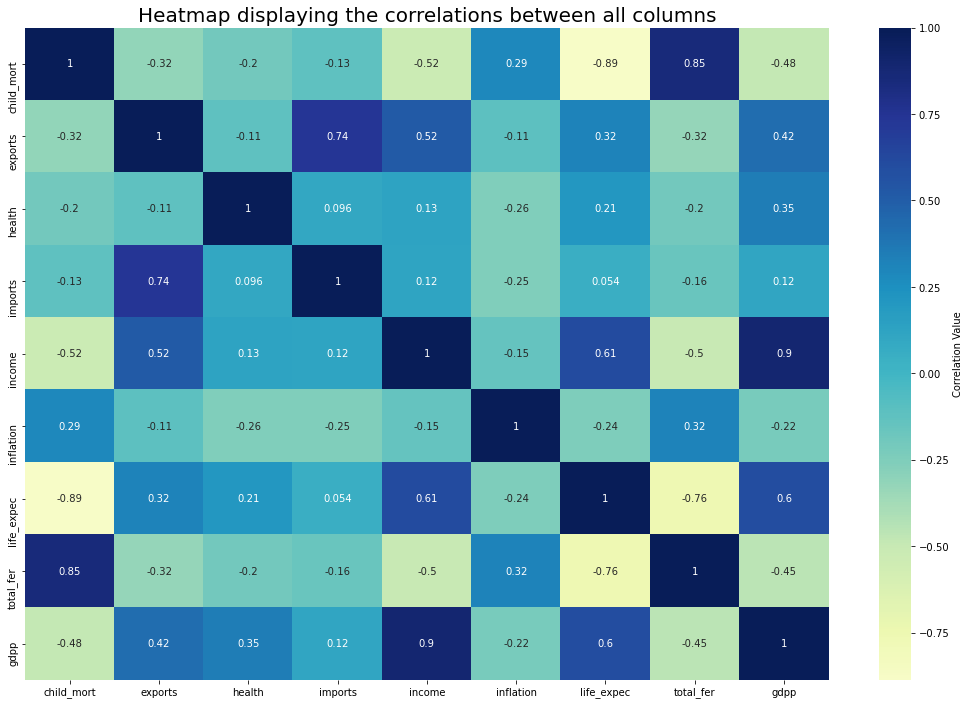

In [32]:
plt.figure(figsize=(18, 12))
plt.title("Heatmap displaying the correlations between all columns", fontsize=20)
sns.heatmap(df.corr(),center=0, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Correlation Value'})
plt.show()

### 3.5. Measure of Central Tendency and Dispersion/Variability of Numerical Variables

In [31]:
from scipy.stats import iqr
for column in df.columns[1:]:
    print('Measure of central tendency and dispersion/variability of column ', column,'\n')
    print('Mean:\t\t', df[column].mean())
    print('Minimun:\t',df[column].min())
    print('Maximum:\t',df[column].max())
    print('Q1:\t\t', df[column].quantile(0.25))
    print('Median:\t\t',df[column].median())
    print('Q3:\t\t', df[column].quantile(0.75))
    print('Range:\t\t', df[column].max()-df[column].min())
    print('IQR:\t\t', iqr(df[column]))
    print('Lower fence:\t',df[column].quantile(0.25)-1.5*iqr(df[column]))
    print('Upper fence:\t',df[column].quantile(0.75)+1.5*iqr(df[column]))
    print('\n')

Measure of central tendency and dispersion/variability of column  child_mort 

Mean:		 38.270059880239515
Minimun:	 2.6
Maximum:	 208.0
Q1:		 8.25
Median:		 19.3
Q3:		 62.1
Range:		 205.4
IQR:		 53.85
Lower fence:	 -72.525
Upper fence:	 142.875


Measure of central tendency and dispersion/variability of column  exports 

Mean:		 41.1089760479042
Minimun:	 0.109
Maximum:	 200.0
Q1:		 23.8
Median:		 35.0
Q3:		 51.349999999999994
Range:		 199.891
IQR:		 27.549999999999994
Lower fence:	 -17.524999999999988
Upper fence:	 92.67499999999998


Measure of central tendency and dispersion/variability of column  health 

Mean:		 6.815688622754495
Minimun:	 1.81
Maximum:	 17.9
Q1:		 4.92
Median:		 6.32
Q3:		 8.600000000000001
Range:		 16.09
IQR:		 3.6800000000000015
Lower fence:	 -0.6000000000000023
Upper fence:	 14.120000000000005


Measure of central tendency and dispersion/variability of column  imports 

Mean:		 46.89021497005987
Minimun:	 0.0659
Maximum:	 174.0
Q1:		 30.2
Median:		 43.3
Q3:		 

# 5. Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
df_sample = df[list(df.columns[1:])]
sc = StandardScaler()
np_scaled = sc.fit_transform(df_sample)
np_scaled.shape

(167, 9)

In [26]:
df_scaled = pd.DataFrame(np_scaled)
df_scaled.columns = df_sample.columns
df_scaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

<a id = '3.0'></a>
# 6. K-means

In [27]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++', random_state = 5)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


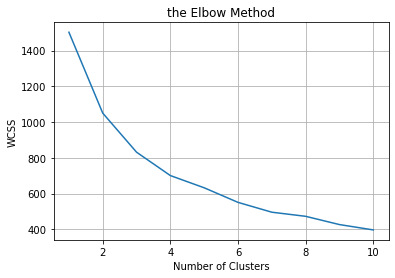

In [28]:
plt.plot(range(1, 11), wcss)
plt.title('the Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

The optimal number of cluster is 3

In [29]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 40)
y_hc = kmeans.fit_predict(df_scaled)

df['cluster_kmeans'] = kmeans.labels_
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster_kmeans  
0       9.44        56.2       5.82    553               0  
1       4.49        76.3       1.65   4090               1  
2      16.10        76.5       2.89   4460               1  
3      22.40        60.1       6.16   3530               0  
4       1.44        76.8       2.13  12200               1

----------------------------------------------------------------------------------------------
child_mort  vs  exports


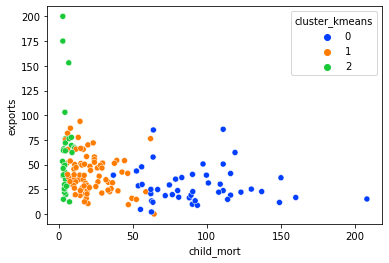

----------------------------------------------------------------------------------------------
child_mort  vs  health


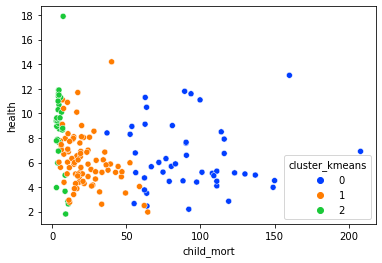

----------------------------------------------------------------------------------------------
child_mort  vs  imports


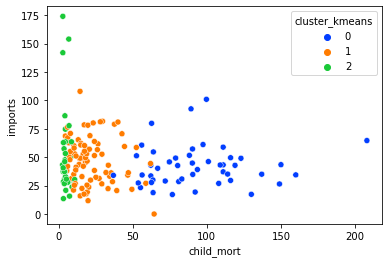

----------------------------------------------------------------------------------------------
child_mort  vs  income


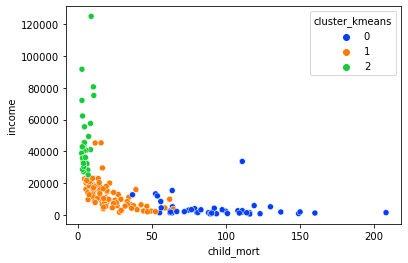

----------------------------------------------------------------------------------------------
child_mort  vs  inflation


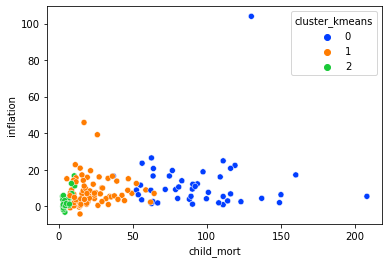

----------------------------------------------------------------------------------------------
child_mort  vs  life_expec


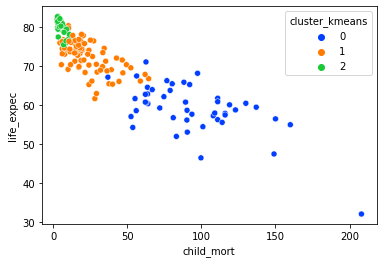

----------------------------------------------------------------------------------------------
child_mort  vs  total_fer


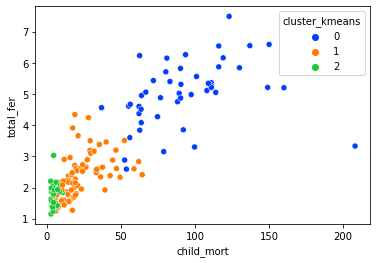

----------------------------------------------------------------------------------------------
child_mort  vs  gdpp


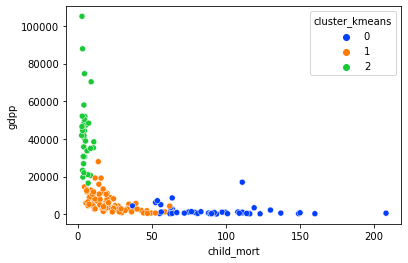

----------------------------------------------------------------------------------------------
exports  vs  child_mort


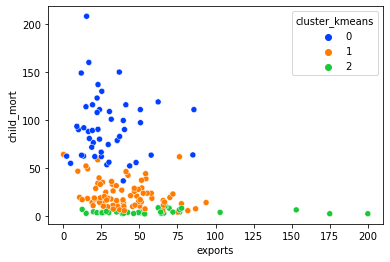

----------------------------------------------------------------------------------------------
exports  vs  health


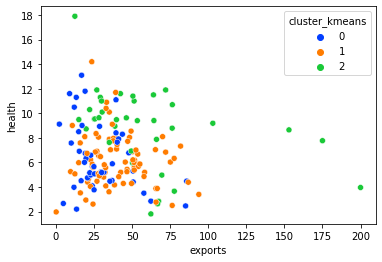

----------------------------------------------------------------------------------------------
exports  vs  imports


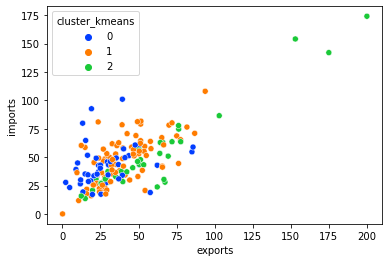

----------------------------------------------------------------------------------------------
exports  vs  income


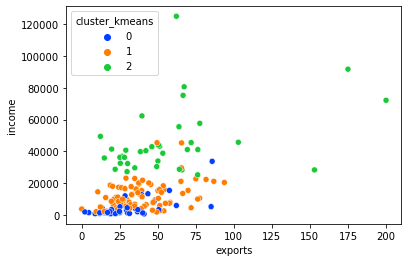

----------------------------------------------------------------------------------------------
exports  vs  inflation


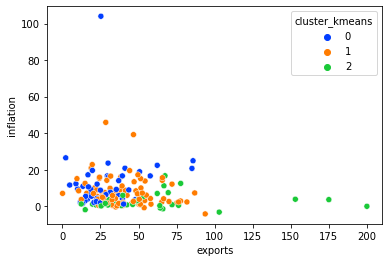

----------------------------------------------------------------------------------------------
exports  vs  life_expec


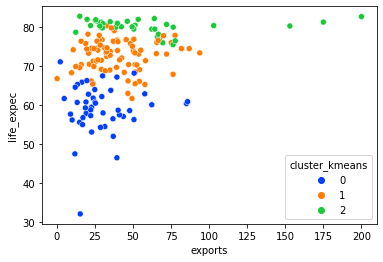

----------------------------------------------------------------------------------------------
exports  vs  total_fer


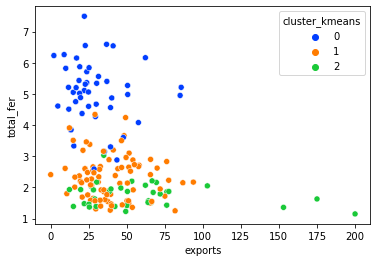

----------------------------------------------------------------------------------------------
exports  vs  gdpp


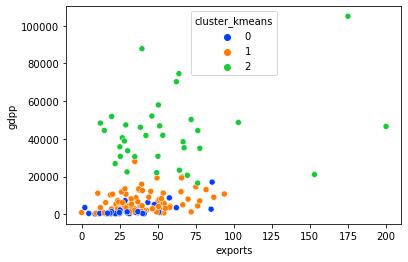

----------------------------------------------------------------------------------------------
health  vs  child_mort


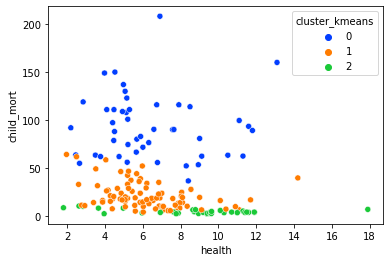

----------------------------------------------------------------------------------------------
health  vs  exports


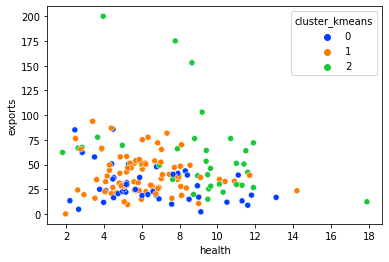

----------------------------------------------------------------------------------------------
health  vs  imports


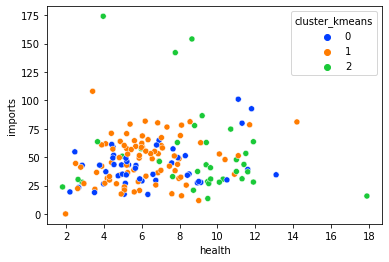

----------------------------------------------------------------------------------------------
health  vs  income


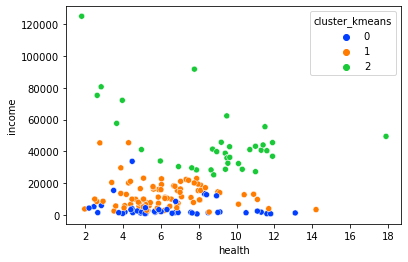

----------------------------------------------------------------------------------------------
health  vs  inflation


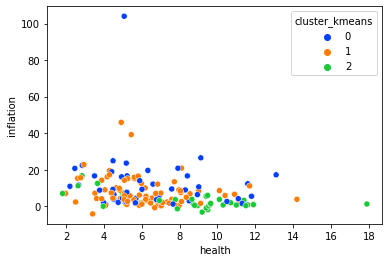

----------------------------------------------------------------------------------------------
health  vs  life_expec


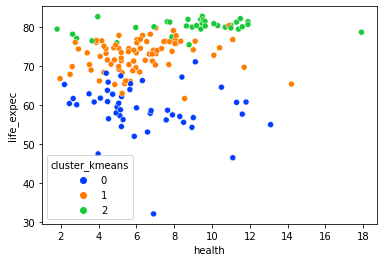

----------------------------------------------------------------------------------------------
health  vs  total_fer


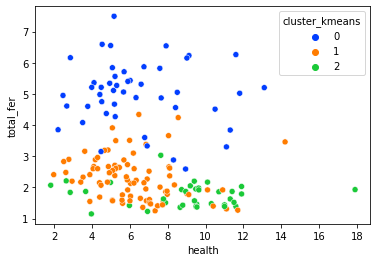

----------------------------------------------------------------------------------------------
health  vs  gdpp


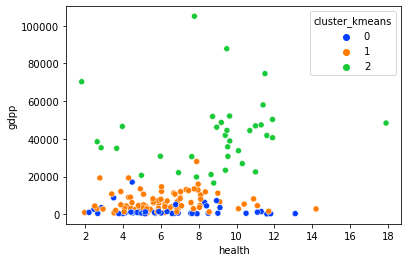

----------------------------------------------------------------------------------------------
imports  vs  child_mort


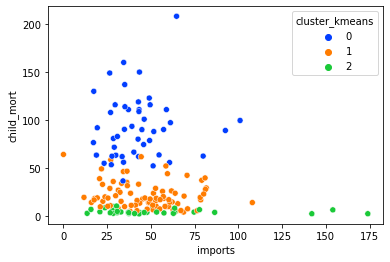

----------------------------------------------------------------------------------------------
imports  vs  exports


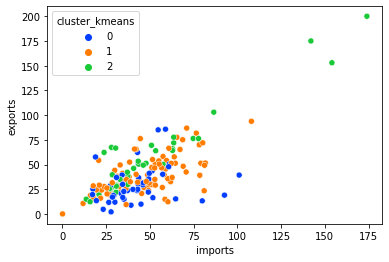

----------------------------------------------------------------------------------------------
imports  vs  health


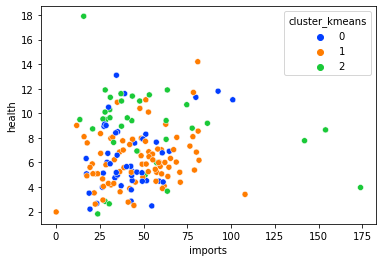

----------------------------------------------------------------------------------------------
imports  vs  income


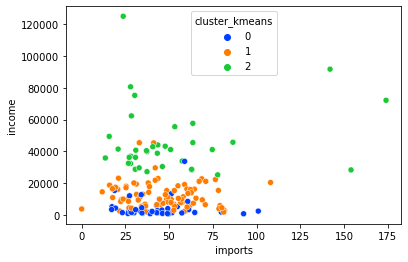

----------------------------------------------------------------------------------------------
imports  vs  inflation


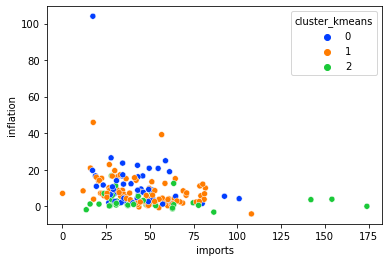

----------------------------------------------------------------------------------------------
imports  vs  life_expec


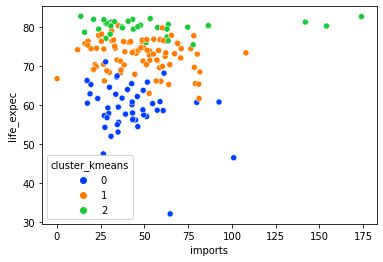

----------------------------------------------------------------------------------------------
imports  vs  total_fer


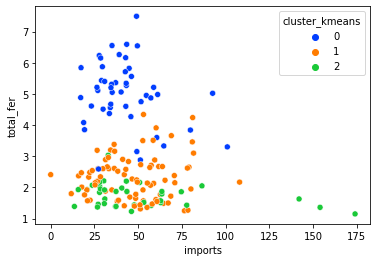

----------------------------------------------------------------------------------------------
imports  vs  gdpp


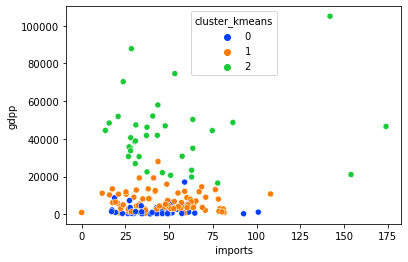

----------------------------------------------------------------------------------------------
income  vs  child_mort


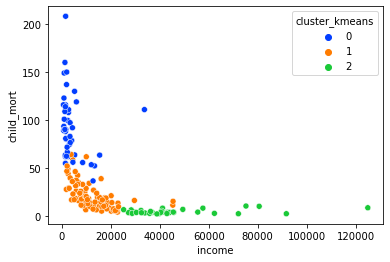

----------------------------------------------------------------------------------------------
income  vs  exports


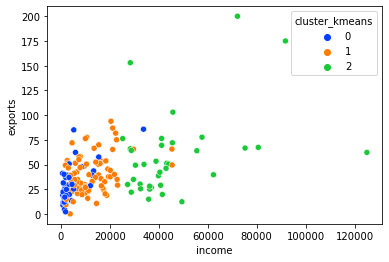

----------------------------------------------------------------------------------------------
income  vs  health


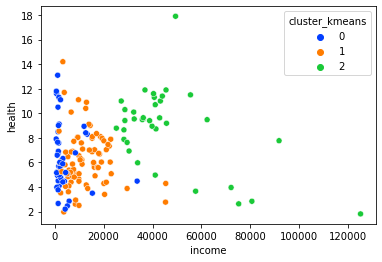

----------------------------------------------------------------------------------------------
income  vs  imports


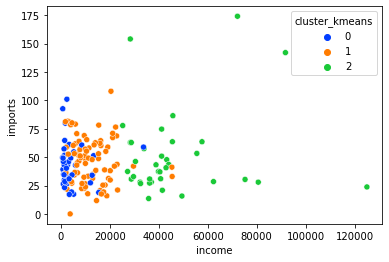

----------------------------------------------------------------------------------------------
income  vs  inflation


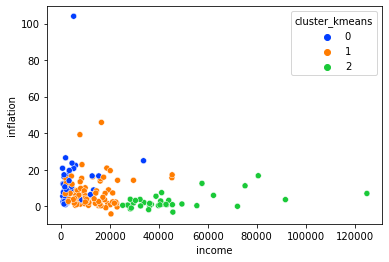

----------------------------------------------------------------------------------------------
income  vs  life_expec


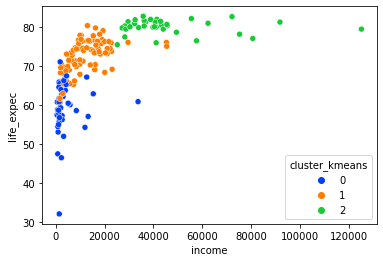

----------------------------------------------------------------------------------------------
income  vs  total_fer


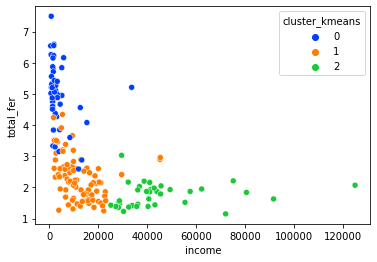

----------------------------------------------------------------------------------------------
income  vs  gdpp


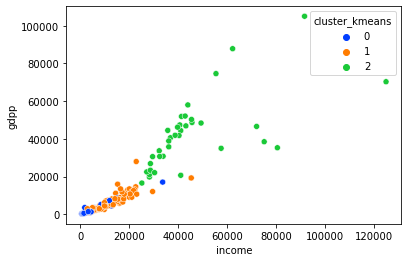

----------------------------------------------------------------------------------------------
inflation  vs  child_mort


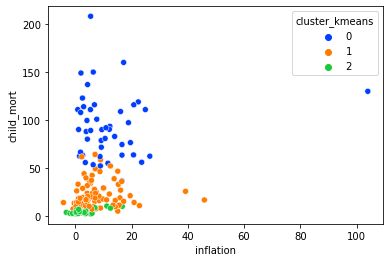

----------------------------------------------------------------------------------------------
inflation  vs  exports


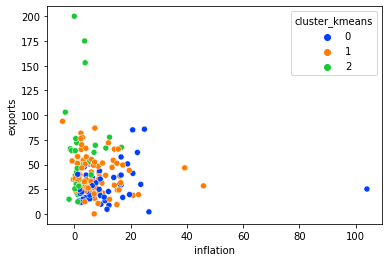

----------------------------------------------------------------------------------------------
inflation  vs  health


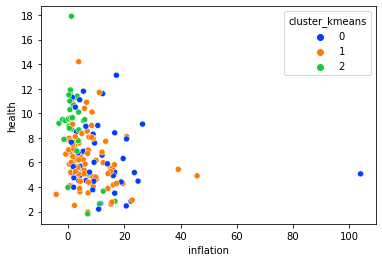

----------------------------------------------------------------------------------------------
inflation  vs  imports


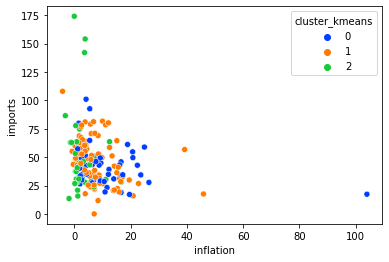

----------------------------------------------------------------------------------------------
inflation  vs  income


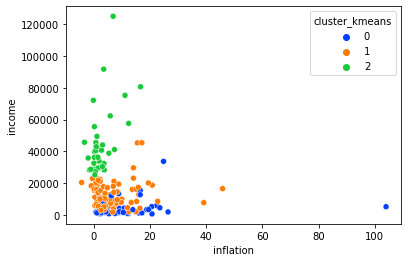

----------------------------------------------------------------------------------------------
inflation  vs  life_expec


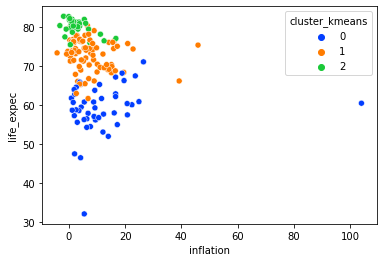

----------------------------------------------------------------------------------------------
inflation  vs  total_fer


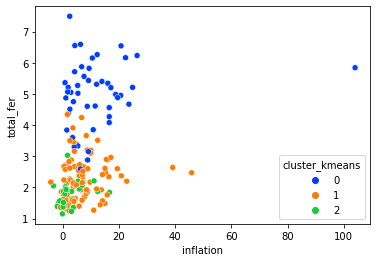

----------------------------------------------------------------------------------------------
inflation  vs  gdpp


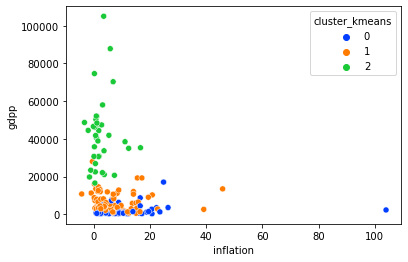

----------------------------------------------------------------------------------------------
life_expec  vs  child_mort


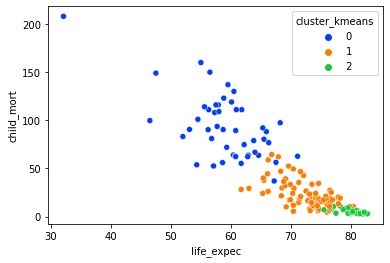

----------------------------------------------------------------------------------------------
life_expec  vs  exports


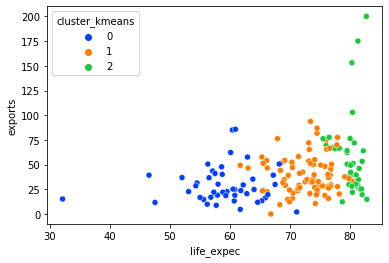

----------------------------------------------------------------------------------------------
life_expec  vs  health


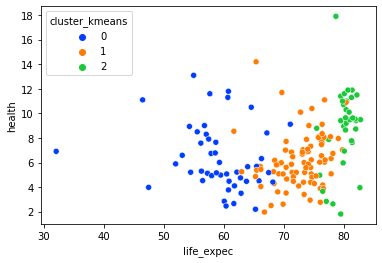

----------------------------------------------------------------------------------------------
life_expec  vs  imports


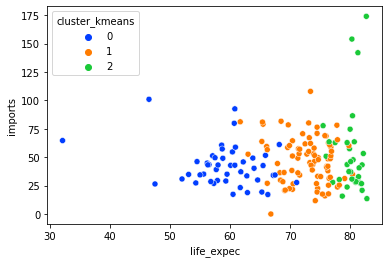

----------------------------------------------------------------------------------------------
life_expec  vs  income


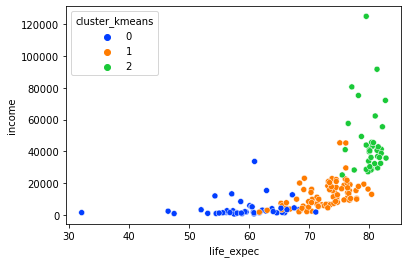

----------------------------------------------------------------------------------------------
life_expec  vs  inflation


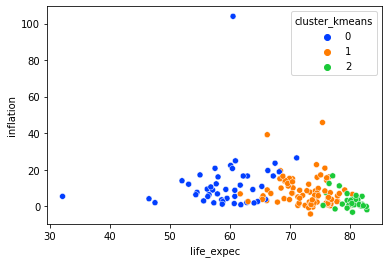

----------------------------------------------------------------------------------------------
life_expec  vs  total_fer


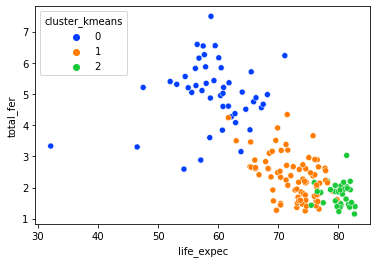

----------------------------------------------------------------------------------------------
life_expec  vs  gdpp


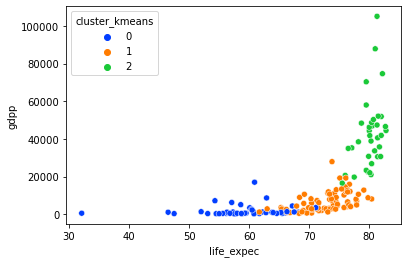

----------------------------------------------------------------------------------------------
total_fer  vs  child_mort


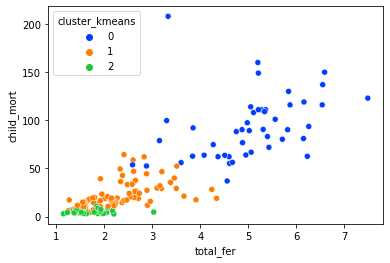

----------------------------------------------------------------------------------------------
total_fer  vs  exports


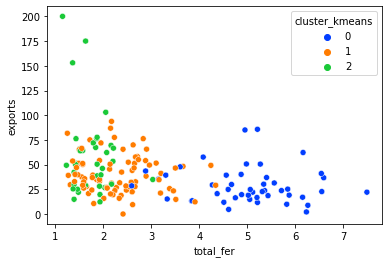

----------------------------------------------------------------------------------------------
total_fer  vs  health


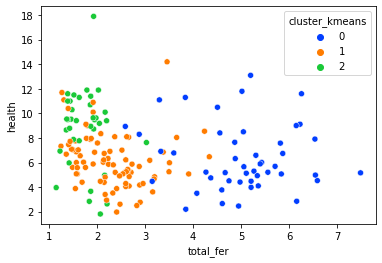

----------------------------------------------------------------------------------------------
total_fer  vs  imports


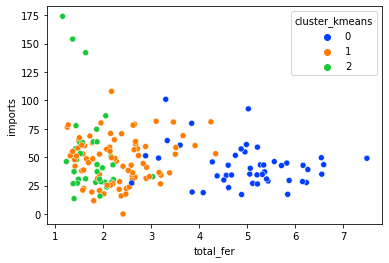

----------------------------------------------------------------------------------------------
total_fer  vs  income


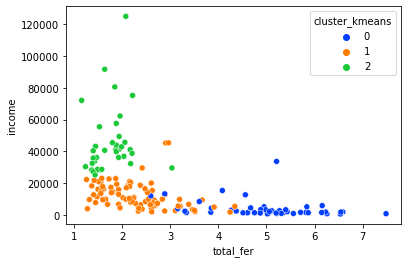

----------------------------------------------------------------------------------------------
total_fer  vs  inflation


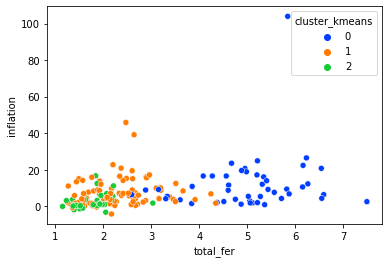

----------------------------------------------------------------------------------------------
total_fer  vs  life_expec


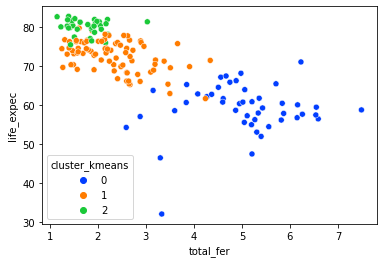

----------------------------------------------------------------------------------------------
total_fer  vs  gdpp


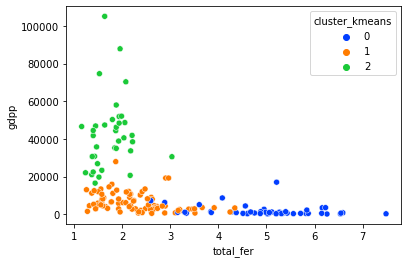

----------------------------------------------------------------------------------------------
gdpp  vs  child_mort


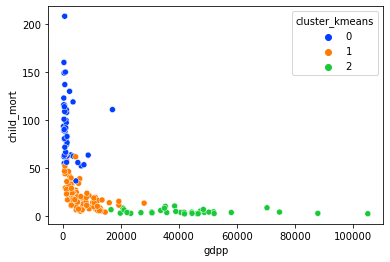

----------------------------------------------------------------------------------------------
gdpp  vs  exports


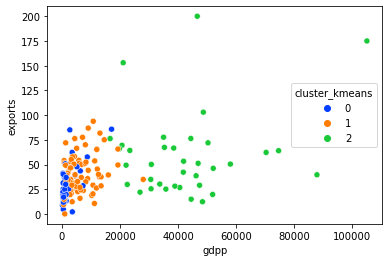

----------------------------------------------------------------------------------------------
gdpp  vs  health


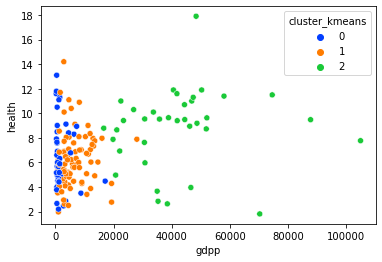

----------------------------------------------------------------------------------------------
gdpp  vs  imports


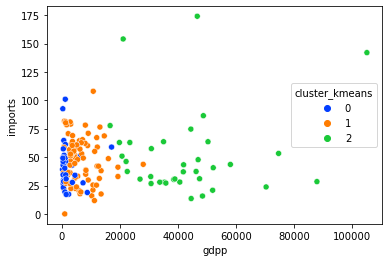

----------------------------------------------------------------------------------------------
gdpp  vs  income


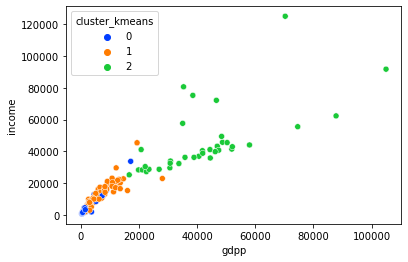

----------------------------------------------------------------------------------------------
gdpp  vs  inflation


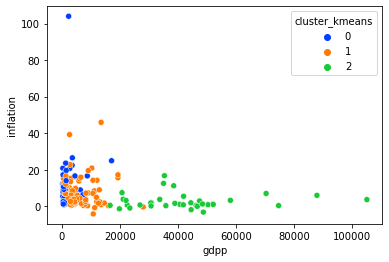

----------------------------------------------------------------------------------------------
gdpp  vs  life_expec


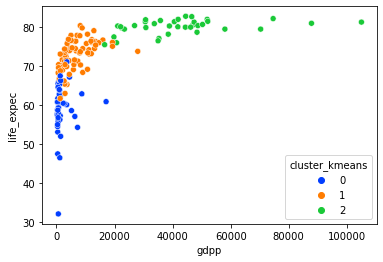

----------------------------------------------------------------------------------------------
gdpp  vs  total_fer


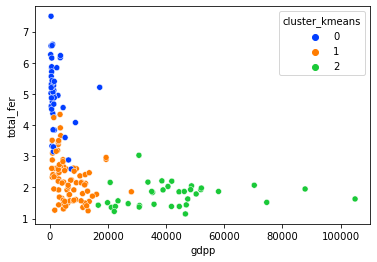

In [70]:
for column1 in df_scaled.columns:
    for column2 in df_scaled.columns:
        if column1 != column2:
            print('----------------------------------------------------------------------------------------------')
            print(column1, ' vs ', column2)
            sns.scatterplot(x = column1, y = column2, data = df, hue = 'cluster_kmeans', palette = 'bright')
            plt.xlabel(column1)
            plt.ylabel(column2)
        plt.show()

<a id = '4.0'></a>
# 6. Hierarchical Clustering

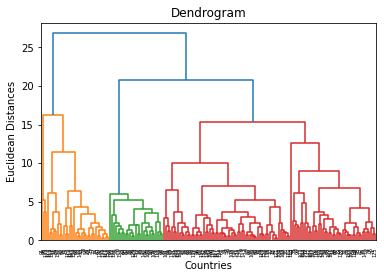

In [31]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distances')
plt.show()

The optimal number of cluster is 3

In [32]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df_scaled)

df['cluster_hierarchical'] = hc.labels_
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster_kmeans  \
0       9.44        56.2       5.82    553               0   
1       4.49        76.3       1.65   4090               1   
2      16.10        76.5       2.89   4460               1   
3      22.40        60.1       6.16   3530               0   
4       1.44        76.8       2.13  12200               1   

   cluster_hierarchical  
0                     2  
1                     1  
2                     1  
3                     1  
4                     1

----------------------------------------------------------------------------------------------
child_mort  vs  exports


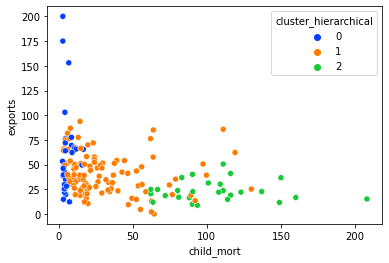

----------------------------------------------------------------------------------------------
child_mort  vs  health


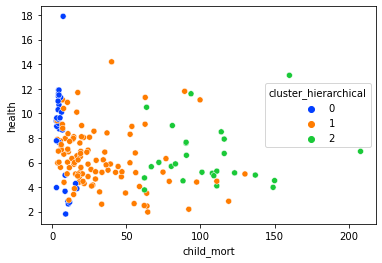

----------------------------------------------------------------------------------------------
child_mort  vs  imports


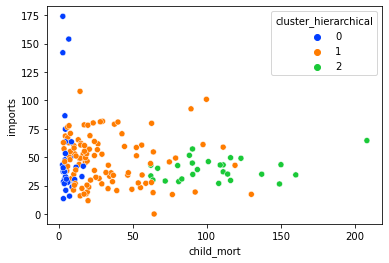

----------------------------------------------------------------------------------------------
child_mort  vs  income


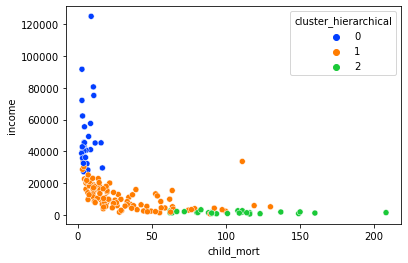

----------------------------------------------------------------------------------------------
child_mort  vs  inflation


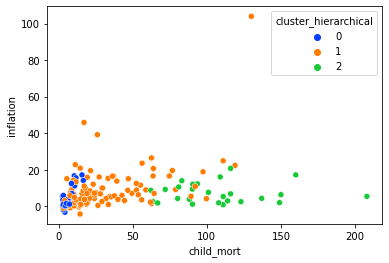

----------------------------------------------------------------------------------------------
child_mort  vs  life_expec


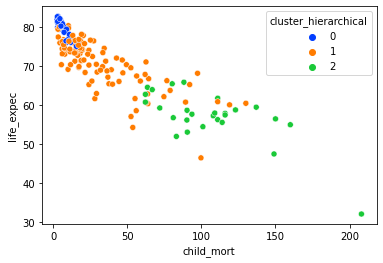

----------------------------------------------------------------------------------------------
child_mort  vs  total_fer


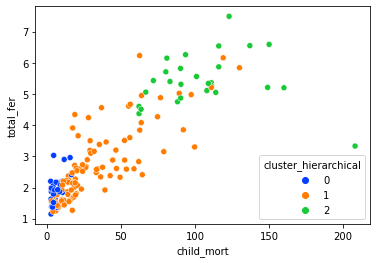

----------------------------------------------------------------------------------------------
child_mort  vs  gdpp


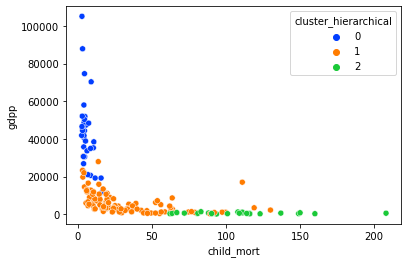

----------------------------------------------------------------------------------------------
exports  vs  child_mort


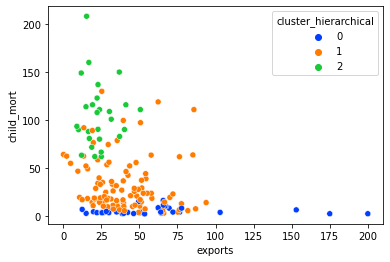

----------------------------------------------------------------------------------------------
exports  vs  health


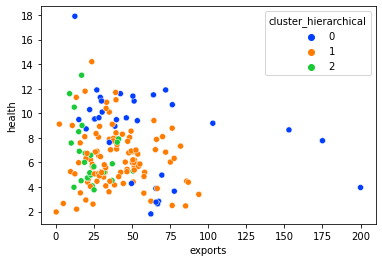

----------------------------------------------------------------------------------------------
exports  vs  imports


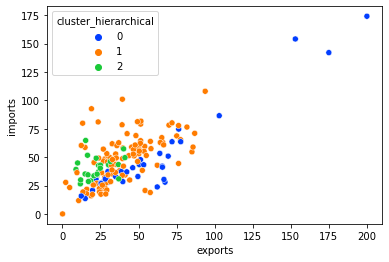

----------------------------------------------------------------------------------------------
exports  vs  income


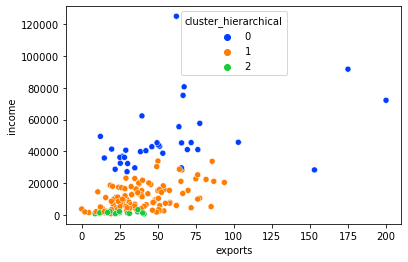

----------------------------------------------------------------------------------------------
exports  vs  inflation


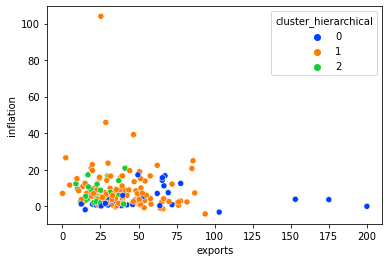

----------------------------------------------------------------------------------------------
exports  vs  life_expec


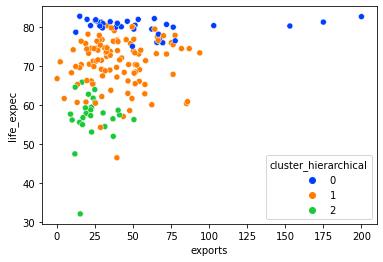

----------------------------------------------------------------------------------------------
exports  vs  total_fer


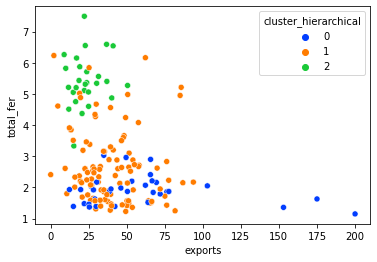

----------------------------------------------------------------------------------------------
exports  vs  gdpp


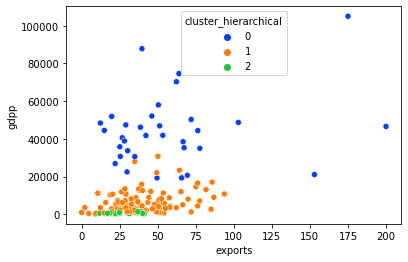

----------------------------------------------------------------------------------------------
health  vs  child_mort


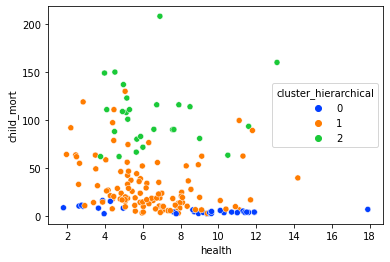

----------------------------------------------------------------------------------------------
health  vs  exports


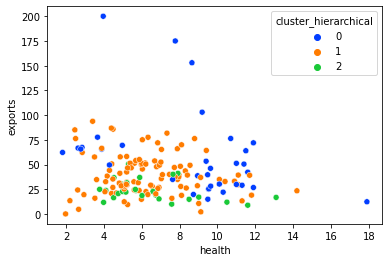

----------------------------------------------------------------------------------------------
health  vs  imports


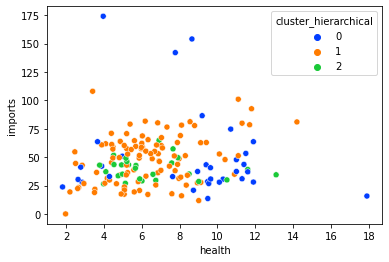

----------------------------------------------------------------------------------------------
health  vs  income


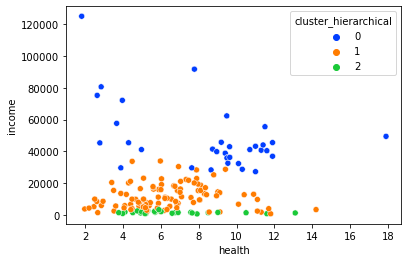

----------------------------------------------------------------------------------------------
health  vs  inflation


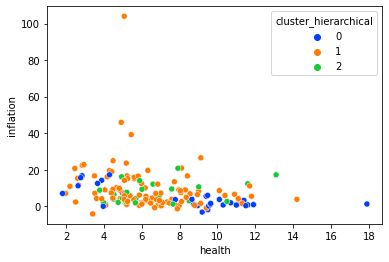

----------------------------------------------------------------------------------------------
health  vs  life_expec


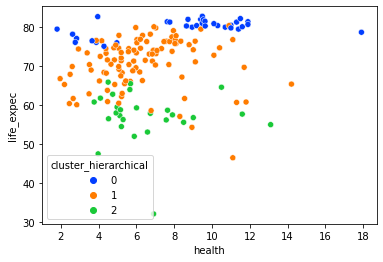

----------------------------------------------------------------------------------------------
health  vs  total_fer


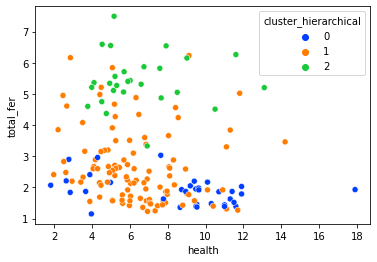

----------------------------------------------------------------------------------------------
health  vs  gdpp


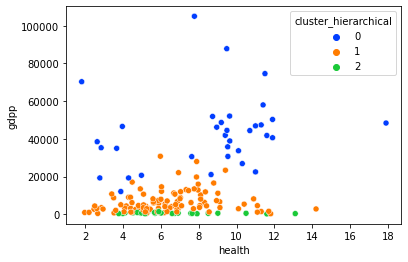

----------------------------------------------------------------------------------------------
imports  vs  child_mort


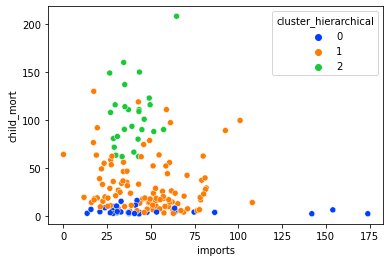

----------------------------------------------------------------------------------------------
imports  vs  exports


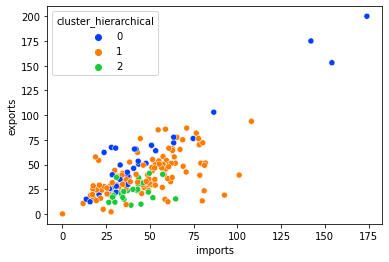

----------------------------------------------------------------------------------------------
imports  vs  health


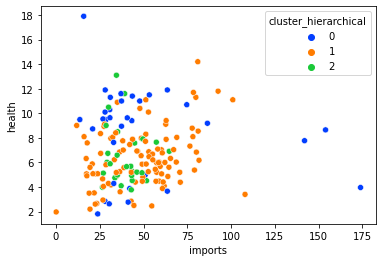

----------------------------------------------------------------------------------------------
imports  vs  income


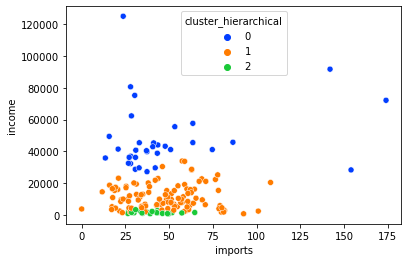

----------------------------------------------------------------------------------------------
imports  vs  inflation


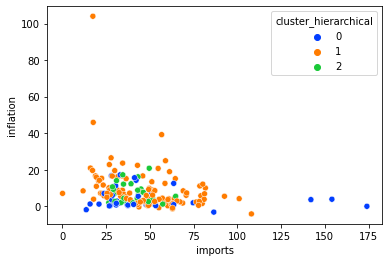

----------------------------------------------------------------------------------------------
imports  vs  life_expec


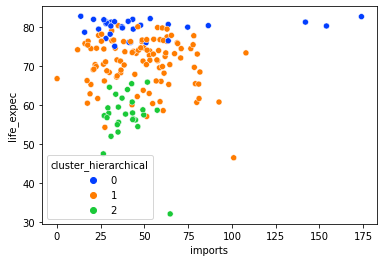

----------------------------------------------------------------------------------------------
imports  vs  total_fer


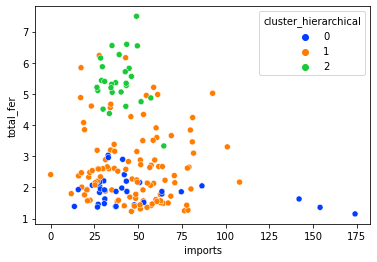

----------------------------------------------------------------------------------------------
imports  vs  gdpp


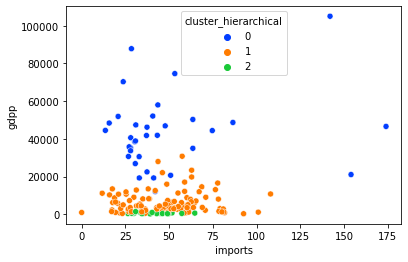

----------------------------------------------------------------------------------------------
income  vs  child_mort


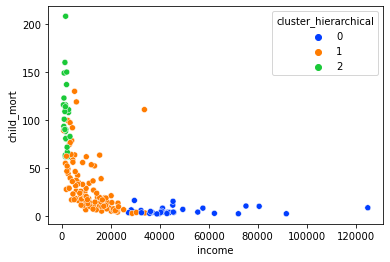

----------------------------------------------------------------------------------------------
income  vs  exports


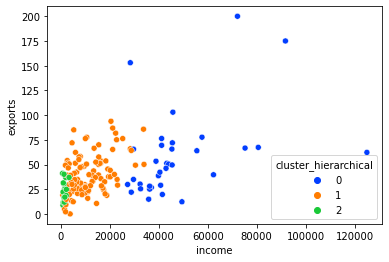

----------------------------------------------------------------------------------------------
income  vs  health


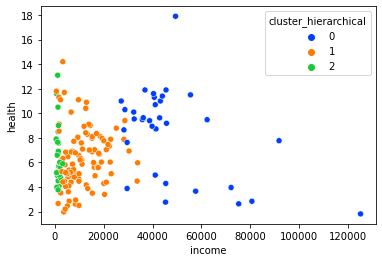

----------------------------------------------------------------------------------------------
income  vs  imports


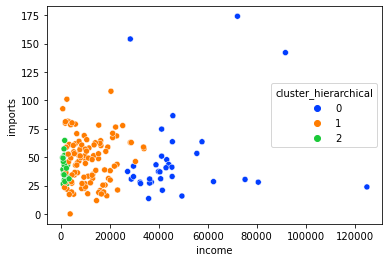

----------------------------------------------------------------------------------------------
income  vs  inflation


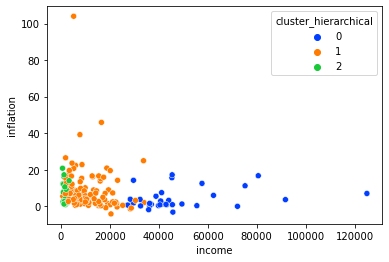

----------------------------------------------------------------------------------------------
income  vs  life_expec


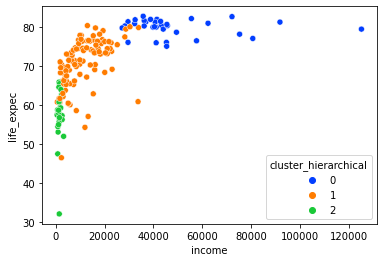

----------------------------------------------------------------------------------------------
income  vs  total_fer


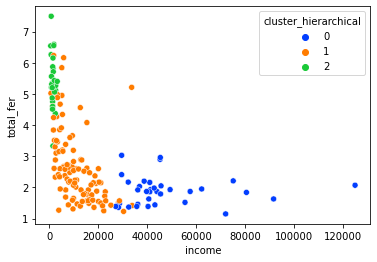

----------------------------------------------------------------------------------------------
income  vs  gdpp


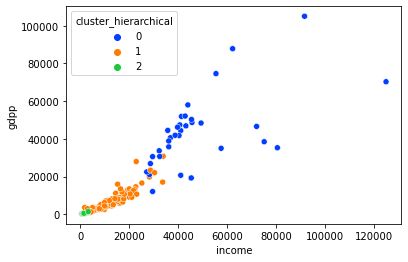

----------------------------------------------------------------------------------------------
inflation  vs  child_mort


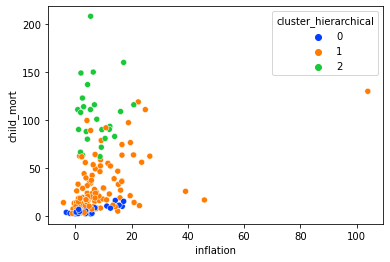

----------------------------------------------------------------------------------------------
inflation  vs  exports


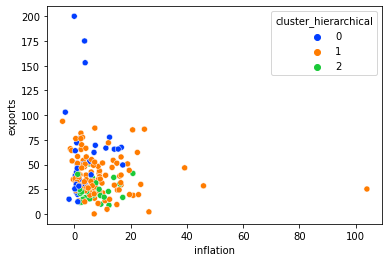

----------------------------------------------------------------------------------------------
inflation  vs  health


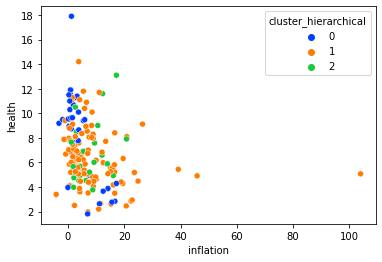

----------------------------------------------------------------------------------------------
inflation  vs  imports


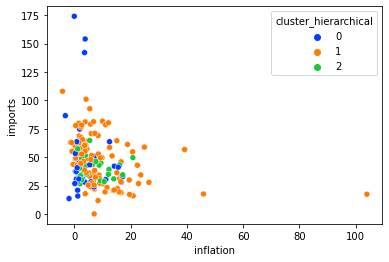

----------------------------------------------------------------------------------------------
inflation  vs  income


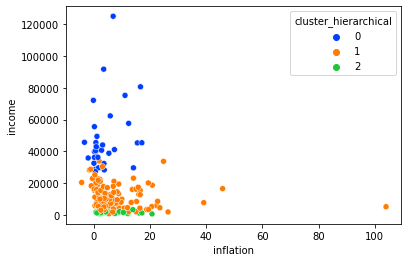

----------------------------------------------------------------------------------------------
inflation  vs  life_expec


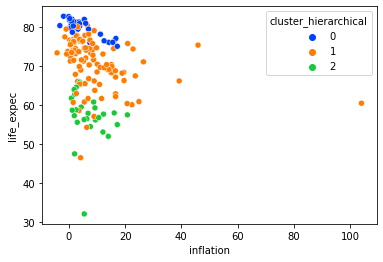

----------------------------------------------------------------------------------------------
inflation  vs  total_fer


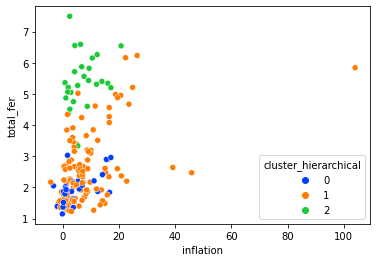

----------------------------------------------------------------------------------------------
inflation  vs  gdpp


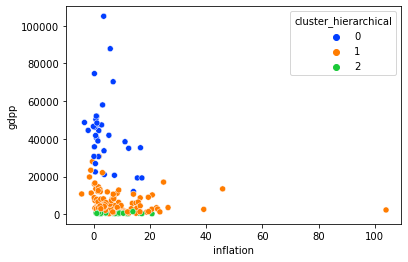

----------------------------------------------------------------------------------------------
life_expec  vs  child_mort


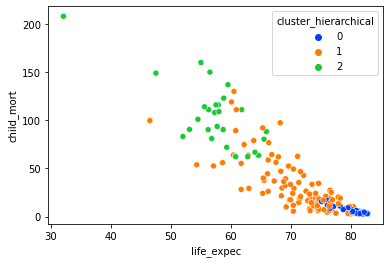

----------------------------------------------------------------------------------------------
life_expec  vs  exports


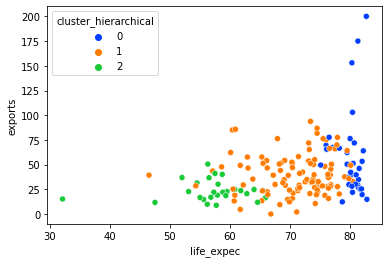

----------------------------------------------------------------------------------------------
life_expec  vs  health


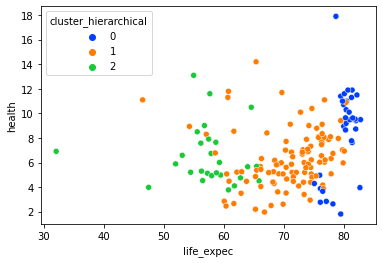

----------------------------------------------------------------------------------------------
life_expec  vs  imports


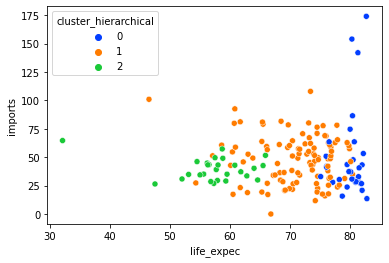

----------------------------------------------------------------------------------------------
life_expec  vs  income


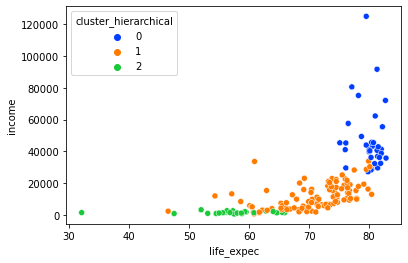

----------------------------------------------------------------------------------------------
life_expec  vs  inflation


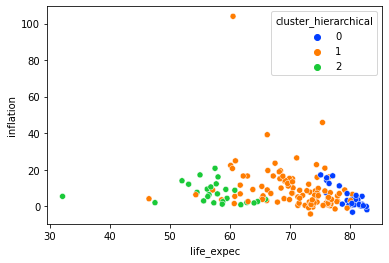

----------------------------------------------------------------------------------------------
life_expec  vs  total_fer


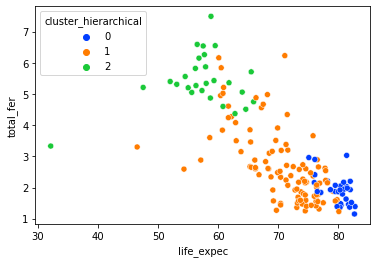

----------------------------------------------------------------------------------------------
life_expec  vs  gdpp


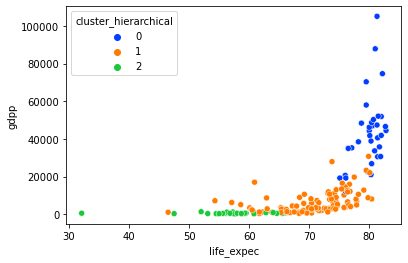

----------------------------------------------------------------------------------------------
total_fer  vs  child_mort


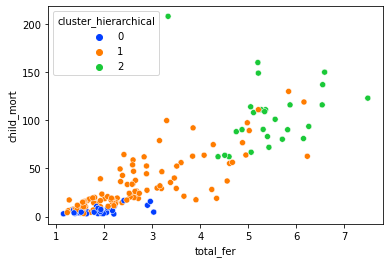

----------------------------------------------------------------------------------------------
total_fer  vs  exports


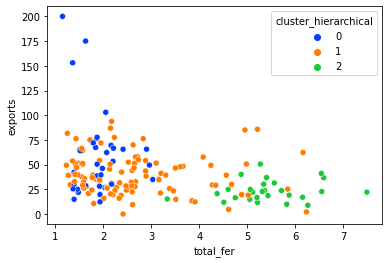

----------------------------------------------------------------------------------------------
total_fer  vs  health


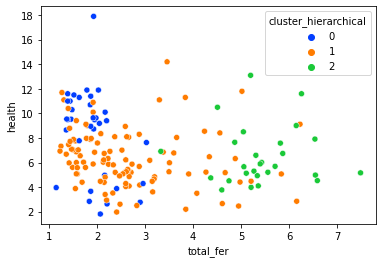

----------------------------------------------------------------------------------------------
total_fer  vs  imports


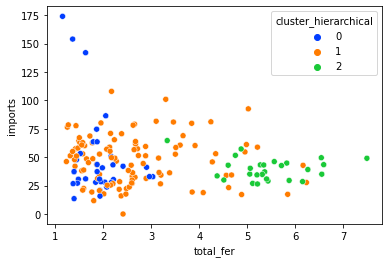

----------------------------------------------------------------------------------------------
total_fer  vs  income


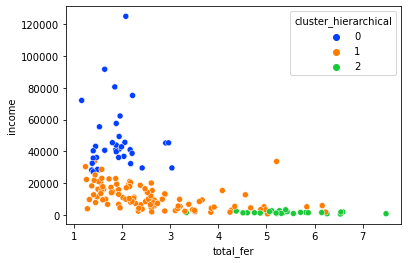

----------------------------------------------------------------------------------------------
total_fer  vs  inflation


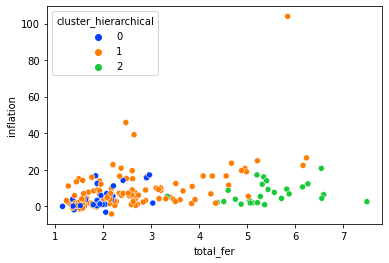

----------------------------------------------------------------------------------------------
total_fer  vs  life_expec


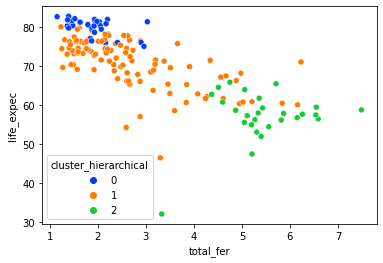

----------------------------------------------------------------------------------------------
total_fer  vs  gdpp


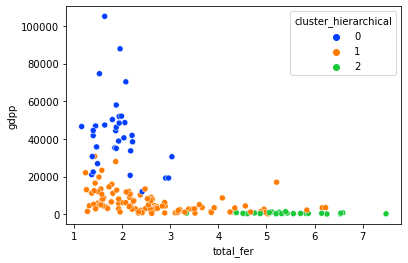

----------------------------------------------------------------------------------------------
gdpp  vs  child_mort


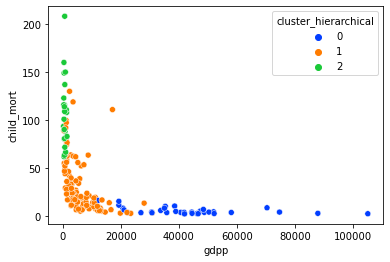

----------------------------------------------------------------------------------------------
gdpp  vs  exports


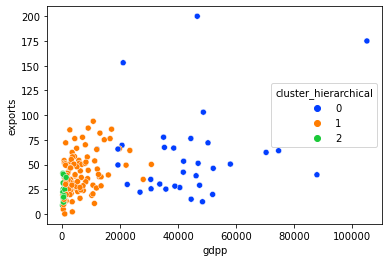

----------------------------------------------------------------------------------------------
gdpp  vs  health


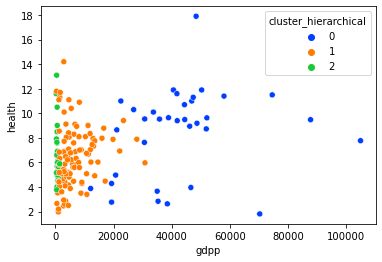

----------------------------------------------------------------------------------------------
gdpp  vs  imports


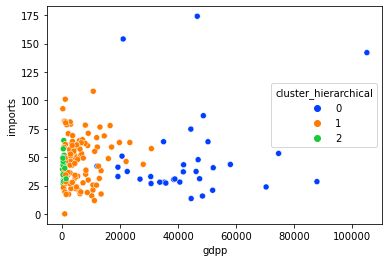

----------------------------------------------------------------------------------------------
gdpp  vs  income


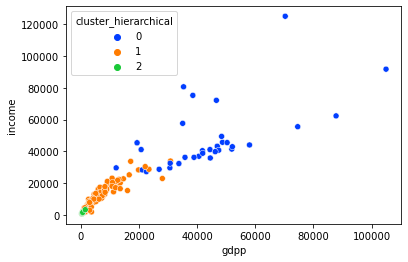

----------------------------------------------------------------------------------------------
gdpp  vs  inflation


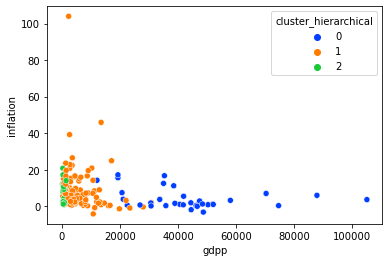

----------------------------------------------------------------------------------------------
gdpp  vs  life_expec


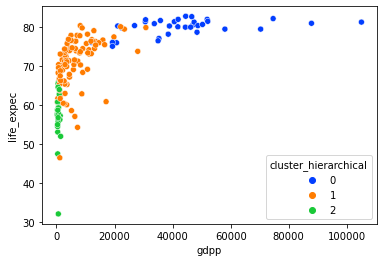

----------------------------------------------------------------------------------------------
gdpp  vs  total_fer


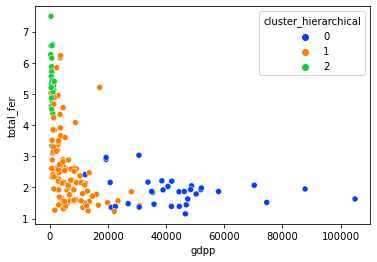

In [71]:
for column1 in df_scaled.columns:
    for column2 in df_scaled.columns:
        if column1 != column2:
            print('----------------------------------------------------------------------------------------------')
            print(column1, ' vs ', column2)
            sns.scatterplot(x = column1, y = column2, data = df, hue = 'cluster_hierarchical', palette = 'bright')
            plt.xlabel(column1)
            plt.ylabel(column2)
        plt.show()

<a id = '5.0'></a>
# 7. Summary

In [61]:
#Summary based on Hierarchical Clustering

cluster_name = ['Cluster 0', 'Cluster 1','Cluster 2']
color = ['Blue', 'Orange','Green']
mortality = ['Low Child Mortality', 'Medium Child Mortality','Medium to High Child Mortality']
life_expec = ['High Life Expectation','Medium to High Life Expectation','Medium Life Expectation']
imports = ['Low to High Imports', 'Low to Medium Imports','Low Imports']
GDPP = ['Medium to High GDPP', 'Low to Medium GDPP','Low GDPP']
income = ['Medium to High Income', 'Low to Medium Income','Low Income']

best_summary = pd.DataFrame({'Color': color, 'Name': cluster_name,
                        'Child Mortality': mortality, 'life_expec': life_expec, 'Imports': imports, 'GDPP':GDPP, 'income':income})
best_summary  

Color       Name                 Child Mortality  \
0    Blue  Cluster 0             Low Child Mortality   
1  Orange  Cluster 1          Medium Child Mortality   
2   Green  Cluster 2  Medium to High Child Mortality   

                        life_expec                Imports  \
0            High Life Expectation    Low to High Imports   
1  Medium to High Life Expectation  Low to Medium Imports   
2          Medium Life Expectation            Low Imports   

                  GDPP                 income  
0  Medium to High GDPP  Medium to High Income  
1   Low to Medium GDPP   Low to Medium Income  
2             Low GDPP             Low Income

<a id = '6.0'></a>
# 8. The selected countries most need to be focused on by the CEO

In [66]:
#Countries that are in the direst need of aid
country_selected = df[df['cluster_hierarchical']==2]

country_selected.shape

(27, 12)

In [67]:
country_selected.sort_values(by=['child_mort','life_expec','income'],ascending=[False,True,True]).head(27)

country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0    15.30    6.91     64.7    1500   
132              Sierra Leone       160.0    16.80   13.10     34.5    1220   
32                       Chad       150.0    36.80    4.53     43.5    1930   
31   Central African Republic       149.0    11.80    3.98     26.5     888   
97                       Mali       137.0    22.80    4.98     35.1    1870   
112                     Niger       123.0    22.20    5.16     49.1     814   
37           Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
25               Burkina Faso       116.0    19.20    6.74     29.6    1430   
64              Guinea-Bissau       114.0    14.90    8.50     35.2    1390   
40              Cote d'Ivoire       111.0    50.60    5.30     43.3    2690   
17                      Benin       111.0    23.80    4.10     37.2    1820   
63                     Guinea       109.0    30.30    4.93     43.2    1190   
28                   Cameroon       108.0    22.20    5.13     27.0    2660   
106                Mozambique       101.0    31.50    5.21     46.2     918   
26                    Burundi        93.6     8.92   11.60     39.2     764   
94                     Malawi        90.5    22.80    6.59     34.9    1030   
150                      Togo        90.3    40.20    7.65     57.3    1210   
0                 Afghanistan        90.2    10.00    7.58     44.9    1610   
36                    Comoros        88.2    16.50    4.51     51.7    1410   
166                    Zambia        83.1    37.00    5.89     30.9    3280   
155                    Uganda        81.0    17.10    9.01     28.6    1540   
56                     Gambia        80.3    23.80    5.69     42.7    1660   
147                  Tanzania        71.9    18.70    6.01     29.1    2090   
129                   Senegal        66.8    24.90    5.66     40.3    2180   
126                    Rwanda        63.6    12.00   10.50     30.0    1350   
93                 Madagascar        62.2    25.00    3.77     43.0    1390   
80                      Kenya        62.2    20.70    4.75     33.6    2480   

     inflation  life_expec  total_fer  gdpp  cluster_kmeans  \
66       5.450        32.1       3.33   662               0   
132     17.200        55.0       5.20   399               0   
32       6.390        56.5       6.59   897               0   
31       2.010        47.5       5.21   446               0   
97       4.370        59.5       6.55   708               0   
112      2.550        58.8       7.49   348               0   
37      20.800        57.5       6.54   334               0   
25       6.810        57.9       5.87   575               0   
64       2.970        55.6       5.05   547               0   
40       5.390        56.3       5.27  1220               0   
17       0.885        61.8       5.36   758               0   
63      16.100        58.0       5.34   648               0   
28       1.910        57.3       5.11  1310               0   
106      7.640        54.5       5.56   419               0   
26      12.300        57.7       6.26   231               0   
94      12.100        53.1       5.31   459               0   
150      1.180        58.7       4.87   488               0   
0        9.440        56.2       5.82   553               0   
36       3.870        65.9       4.75   769               0   
166     14.000        52.0       5.40  1460               0   
155     10.600        56.8       6.15   595               0   
56       4.300        65.5       5.71   562               0   
147      9.250        59.3       5.43   702               0   
129      1.850        64.0       5.06  1000               0   
126      2.610        64.6       4.51   563               0   
93       8.790        60.8       4.60   413               0   
80       2.090        62.8       4.37   967               0   

     cluster_hierarchical  
66              